<a id="top_section"></a>
# Introduction

When I started doing this analysis my main goal was getting experience. I'm still learning and trying to improve my skills, so there might be some areas can be improved.


### My main objectives on this project are:

* Explorating and visualising the data, trying to get some insights about our dataset
* Getting data in better shape by feature engineering to help us in building better models
* Building and tuning couple regression models to get some stable results on predicting Titanic disaster outcome

### In this notebook we are going to try explore the data we have and going try answer questions like:

- What is the ...?

<a id="toc_section"></a>
## Table of Contents
* [Introduction](#top_section)
    - [Well... What do we have here?](#section1)
* [Exploring the Data](#section2)
    - [Categorical Features](#section3)
    - [Numerical Features](#section4)
    - [Missing Values](#section5)    
* [Building the Feature Engineering Machine](#section6)
    - [Data Merger](#section7)
    - [Family Assembler](#section8)
    - [Family Survival Detector](#section9)   
    - [Title Extractor](#section10)
    - [Title Encoder](#section11)
    - [Age Filler](#section12)
    - [Age Grouper](#section13)
    - [Fare Imputer](#section14)
    - [Fare Encoder](#section15)
    - [Scaler](#section16)
    - [Embarked Processor](#section17)
    - [Deck Finder](#section18)
    - [Gender Mapper](#section19)
    - [Pclass Sorter](#section20)
    - [Ticket Cleaner](#section21)
    - [Housekeeping](#section22)
    - [Feeding the Machine](#section23)
* [Double Check](#section24)
    - [Correlation Matrix](#section25)
* [Modelling](#section26)
    - [Model Selection](#section27)
    - [Cross-Validate Models](#section28)
    - [Model Results](#section29)
    - [ROC'S of the Models](#section30)
    - [Learning Curves of the Models](#section31)
* [Feature Selection](#section31.1)
    - [Feature Importances](#section32)
    - [Decision Trees](#section33)    
    - [Feature Selection by Recursive Feature Elimination](#section34)
    - [Dimension Reduction by Principal Component Analysis](#section35)
    - [Reduced Dimension Model Results with Cross-Validation](#sectioncv)
* [Plotting Decision Boundaries](#section36)
* [Plotting Decision Regions](#section37)
* [Submission & Some Last Words](#sectionlst)

In [2]:
# Importing neccesary packages.

import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator

#

from scipy import interp
import math
from scipy.stats import norm
from scipy import stats

#

import warnings
warnings.filterwarnings('ignore') # Disabling warnimgs for clearer outputs
pd.options.display.max_columns = 50 # Pandas option to increase max number of columns to display
plt.style.use('ggplot') # Setting default plot style


<a id="section1"></a>
# Well... What do we have here?

Ok we have two sets(train and test) data and in total 2219 observations 80 features. Our target is SalePrice column which is not present on the test set(duh!)... With basic inspection I'd say 'PassengerId' has effect on survival, but... Maybe we can use it on feature engineering part? For the rest we gonna inspect them individually soon but  generally speaking they look mostly categorical data with some continuous values like YearBuilt and Fireplaces.

I'm going to use different sets of variables for visualizing and feature engineering so let's start with assigning visualizing ones. I'm also saving idx variable for future use.

### [Back To Table of Contents](#toc_section)

In [3]:
# Read train and test data from csv files for visualization
v_train = pd.read_csv('./house-prices-advanced-regression-techniques/train.csv')
v_test = pd.read_csv('./house-prices-advanced-regression-techniques/test.csv')
idx = len(v_train)

In [4]:
# Checking train and test sets
display(v_train.sample(3))
display(v_test.sample(3))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,...,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
423,424,60,RL,80.0,9200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,...,1,TA,Attchd,1998.0,Fin,3,696,TA,TA,Y,0,66,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,315000
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,Inside,Sev,Timber,Norm,Norm,1Fam,1Story,7,5,1965,1965,Hip,CompShg,BrkFace,BrkFace,...,2,Gd,Attchd,1965.0,RFn,2,513,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
1428,1429,30,RM,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,7,1940,1992,Gable,CompShg,MetalSd,MetalSd,...,2,Gd,Attchd,1940.0,Unf,1,240,TA,TA,Y,0,0,154,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Abnorml,119000


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,...,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
937,2398,45,RL,85.0,12172,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1.5Unf,5,7,1940,1996,Gable,CompShg,Wd Sdng,HdBoard,...,Typ,0,NaN,Attchd,1975.0,Unf,2.0,512.0,TA,TA,Y,284,24,0,0,192,0,NaN,MnPrv,NaN,0,10,2007,WD,Normal
971,2432,20,RL,NaN,7500,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1959,2003,Hip,CompShg,BrkFace,BrkFace,...,Typ,0,NaN,Attchd,1959.0,RFn,1.0,286.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,0,7,2007,WD,Normal
666,2127,60,RM,57.0,8094,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2.5Unf,6,8,1910,1983,Gable,CompShg,Wd Sdng,Wd Sdng,...,Typ,0,NaN,Detchd,NaN,NaN,1.0,360.0,NaN,NaN,Y,64,0,180,0,0,0,NaN,MnPrv,Shed,1000,9,2008,WD,Normal


In [5]:
# Merging visualization datasets.
v_train.drop('Id', axis=1, inplace=True);
v_test.drop('Id', axis=1, inplace=True);
v_merged = pd.concat([v_train, v_test])


In [6]:
# Checking merged shape
display(v_merged.shape)

(2919, 80)

In [7]:
# Checking features and target columns
display(v_merged.columns)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [40]:
# Checking dtypes
display(v_merged.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

None

<a id="section2"></a>
# Exploring the Data

<a id="section3"></a>
## Categorical Features

- **MSSubClass**: Identifies the type of dwelling involved in the sale.
- **MSZoning**: Identifies the general zoning classification of the sale.
- **Street**: Type of road access to property
- **Alley**: Type of alley access to property
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits

## Numerical Features
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet


In [31]:
# Selecting categorical data for univariate analysis
cats = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2']


def plotFrequency(cats):
    #"A plot for visualize categorical data, showing both absolute and relative frequencies"
    fig, axes = plt.subplots(math.ceil(len(cats) / 2), 2, figsize=(20,12))
    axes = axes.flatten()

    for ax, cat in zip(axes, cats):
        if cat == 'Survived':
            total = float(len(v_train[cat]))
        else:
            total = float(len(v_merged[cat]))
        sns.countplot(v_merged[cat], palette='plasma', ax=ax)

        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2.,
                    height + 10,
                    '{:1.2f}%'.format((height / total) * 100),
                    ha="center")

        plt.ylabel('Count', fontsize=15, weight='bold')

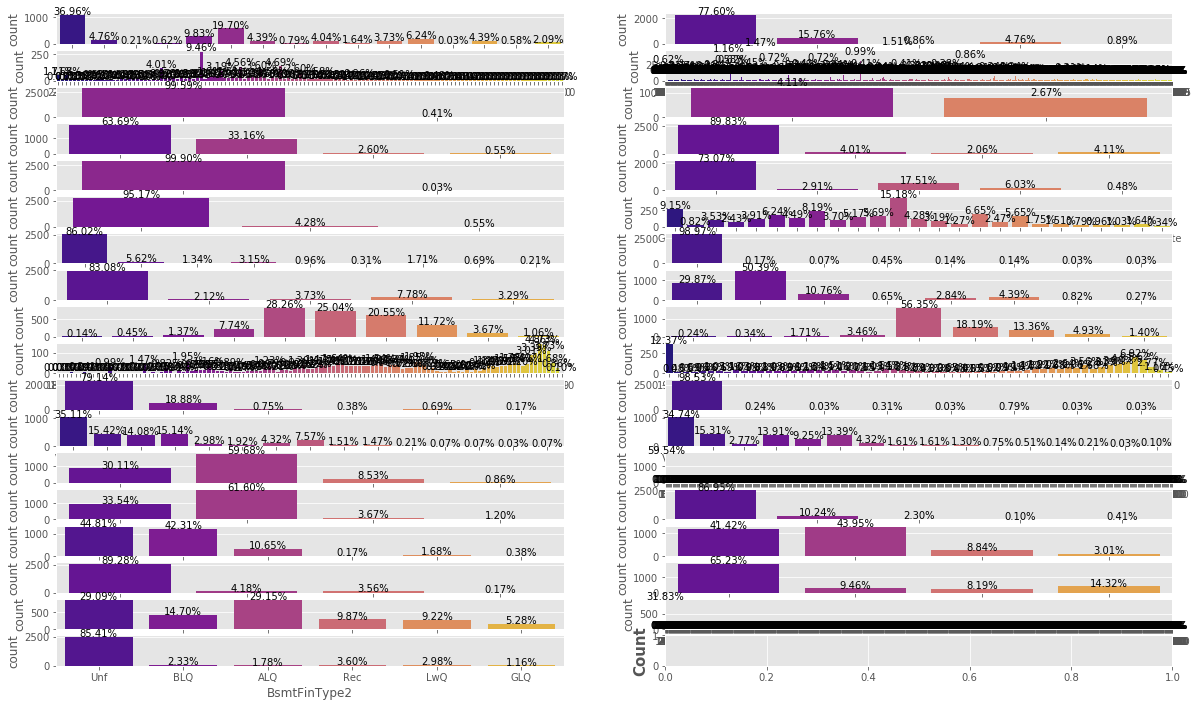

In [32]:
plotFrequency(cats)

<a id="section5"></a>
## Missing Values

On both datasets Cabin feature is missing a lot, it looks this feature not useful for modelling but we might give it a chance with feature engineering later.

Again, Age feature has many missing values, we can impute them with some logical way to use later...

There are little number of missing values on Embarked and Fare, I think we can impute them without taking much risk.

### [Back To Table of Contents](#toc_section)

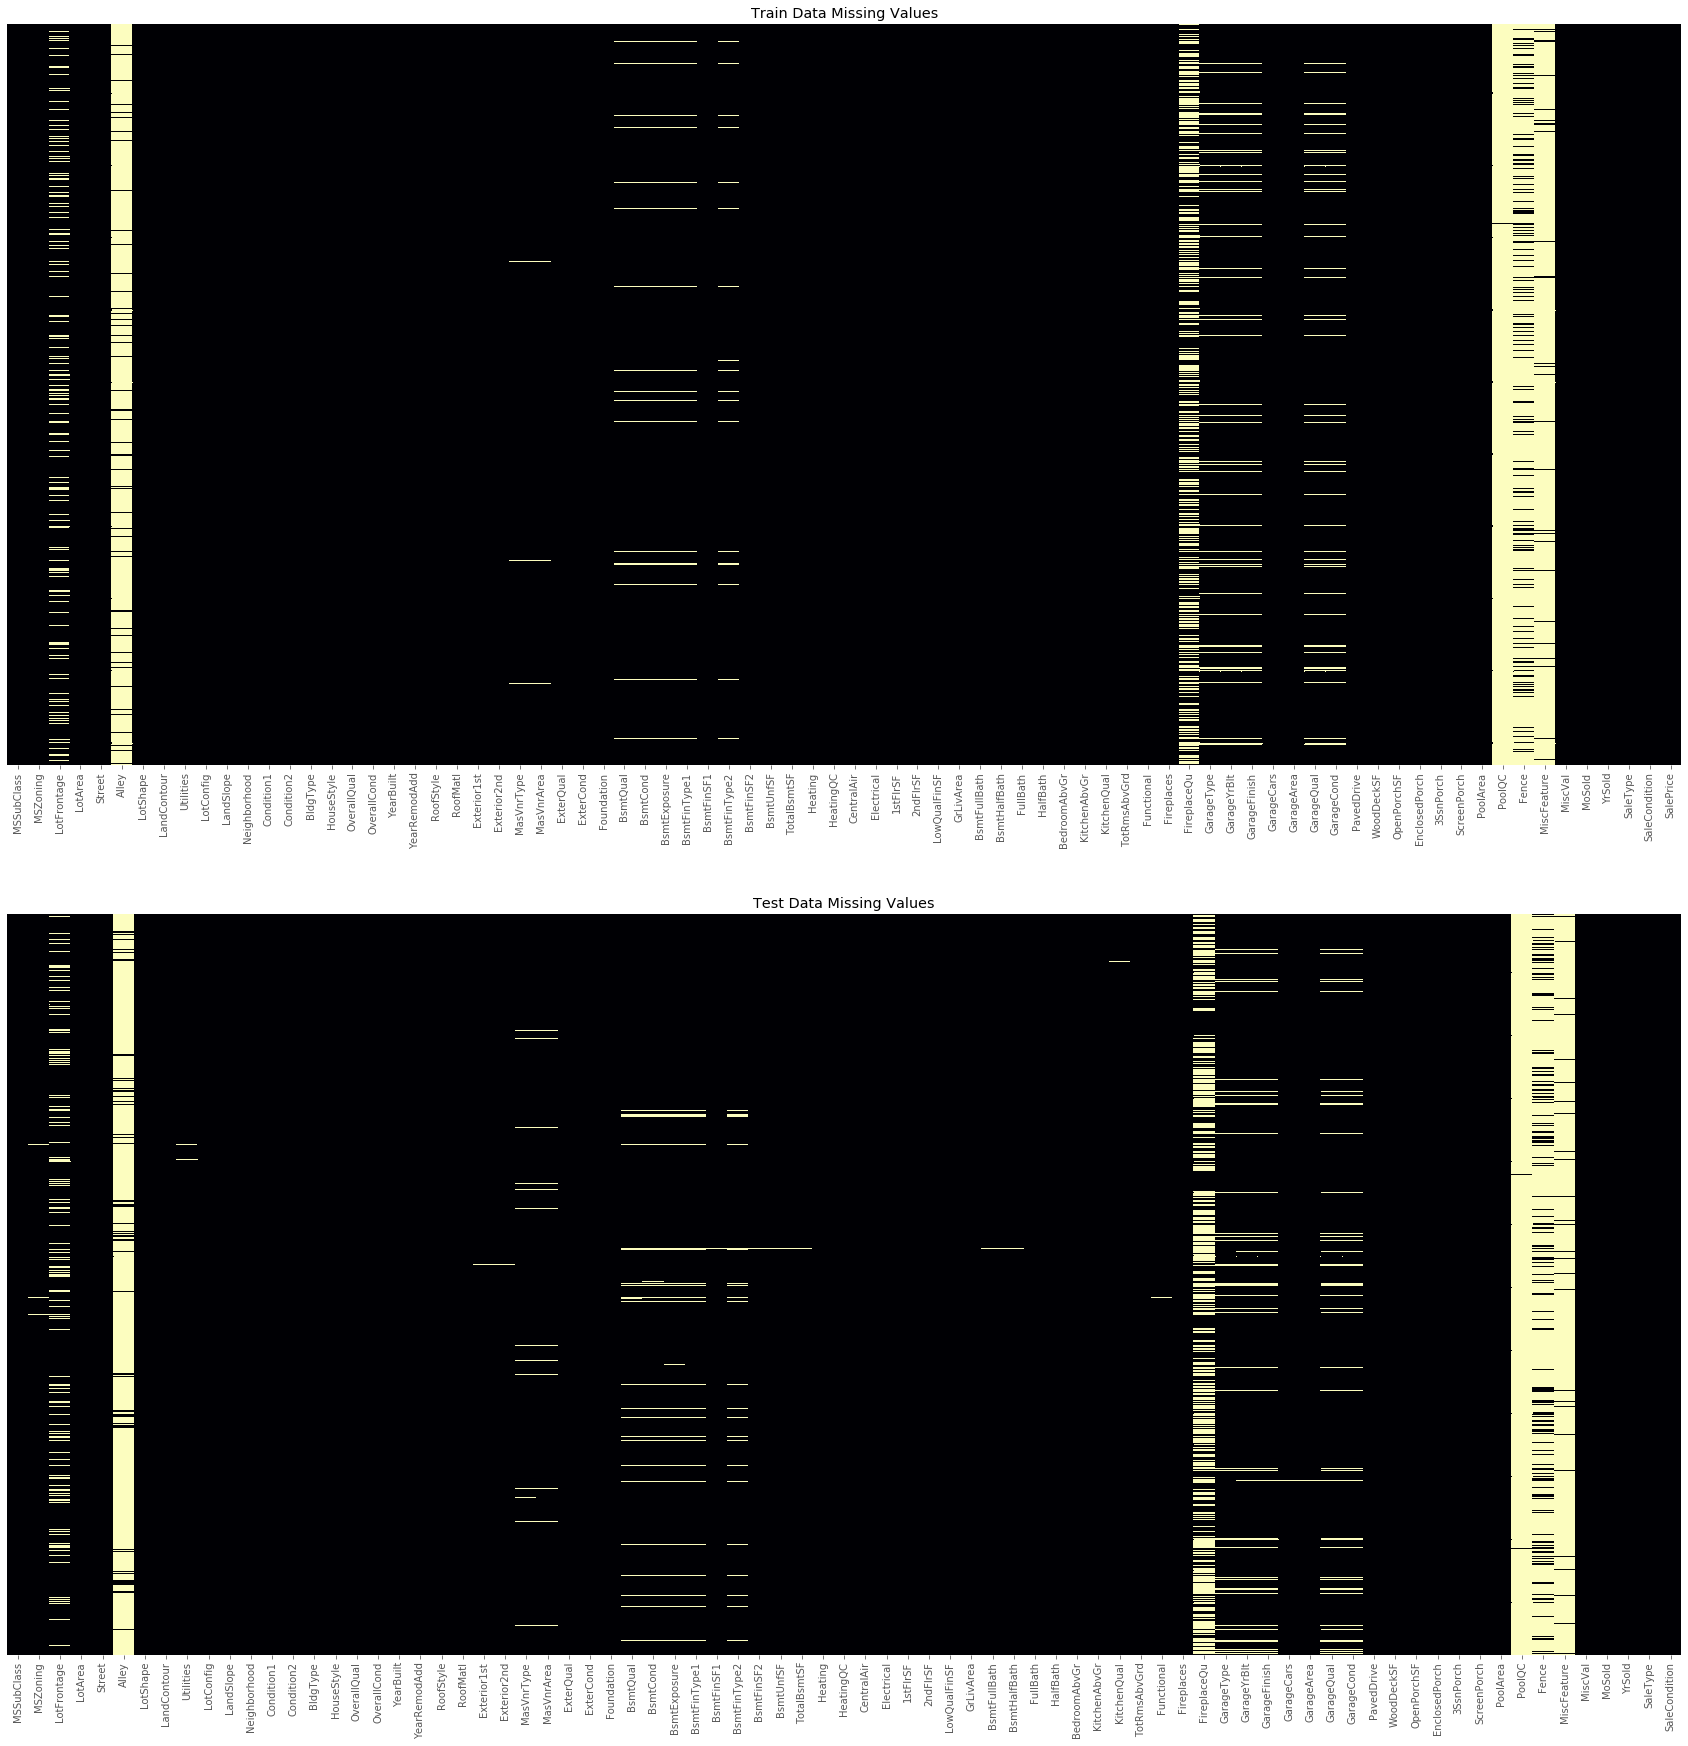

In [27]:
# Detecting missing data

fig, ax = plt.subplots(nrows=2, figsize=(30, 30))
half = len(v_train)/2
sns.heatmap(v_train.loc[:half].isnull(),
            yticklabels=False,
            cbar=False,
            cmap='magma',
            ax=ax[0])
sns.heatmap(v_test.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='magma',
            ax=ax[1])

ax[0].set_title('Train Data Missing Values')
ax[1].set_title('Test Data Missing Values')

plt.xticks(rotation=90)
plt.show()

In [78]:
# Make Table to see NA values and class in total data set

def get_na_and_d_type(column):
    num_na = column.isnull().sum()
    dtype = column.dtype
    sample =column.sample(n=4).reset_index( drop=True)
    print(sample)
    data_1= pd.Series({'number of missing data': num_na,'data type': dtype})
    return pd.concat([sample, data_1], )

v_merged_na = v_merged.apply(get_na_and_d_type, axis=0).T
# v_merged_na = v_merged_na.loc[v_merged_na['number of missing data'] != 0]
v_merged_na


0    20
1    90
2    70
3    60
Name: MSSubClass, dtype: object
0    20
1    60
2    50
3    60
Name: MSSubClass, dtype: int64
0    RL
1    RL
2    RL
3    RL
Name: MSZoning, dtype: object
0    68.0
1    41.0
2    43.0
3    74.0
Name: LotFrontage, dtype: float64
0     7360
1     7200
2    15660
3     6600
Name: LotArea, dtype: int64
0    Pave
1    Pave
2    Pave
3    Pave
Name: Street, dtype: object
0     NaN
1    Grvl
2    Pave
3     NaN
Name: Alley, dtype: object
0    IR1
1    IR1
2    Reg
3    IR1
Name: LotShape, dtype: object
0    Low
1    Lvl
2    Lvl
3    Lvl
Name: LandContour, dtype: object
0    AllPub
1    AllPub
2    AllPub
3    AllPub
Name: Utilities, dtype: object
0    Inside
1    Inside
2    Inside
3    Inside
Name: LotConfig, dtype: object
0    Gtl
1    Gtl
2    Gtl
3    Mod
Name: LandSlope, dtype: object
0    Edwards
1    OldTown
2     NWAmes
3      NAmes
Name: Neighborhood, dtype: object
0    Norm
1    Norm
2    Norm
3    Norm
Name: Condition1, dtype: object
0    Norm
1 

,0,1,2,3,number of missing data,data type
MSSubClass,20,60,50,60,0,int64
MSZoning,RL,RL,RL,RL,4,object
LotFrontage,68,41,43,74,486,float64
LotArea,7360,7200,15660,6600,0,int64
Street,Pave,Pave,Pave,Pave,0,object
...,...,...,...,...,...,...
MoSold,6,7,7,3,0,int64
YrSold,2006,2009,2006,2006,0,int64
SaleType,WD,WD,WD,New,1,object
SaleCondition,Normal,Normal,Normal,Partial,0,object


In [ ]:
# Convert MSSubClass variables from numeric to categorical
